In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Quick EDA on einspeisedaten_gen_wind_speed.csv

### Decription

#### Features
This data set contains of **3** features which are placed in one column each: 
1) dt_start_utc
2) voronoi_area_id
3) windspeed_ms

---

**dt_start_it** contains of timestamps which includes day and time of that day in the format: 
yyyy-mm-dd hh:mm:ss

for the year section:
* y = year
* m = m
* d = d

for the time section:
* h = hour
* m = minute
* s = second

It remains unclear to this time which time points are recorded by the time stamps. What does start mean, what does it mean?

---
**voronoi_area_id** means the the the id of each geographical area. Voronoi is a technique to draw optimized areas in this case for meteorological forecasts. So it gives us an overview where the specific wind speeds were oberserved. 
>Remark: An area overview could be helpful. 
---
**windspeed_ms** is the windspeed in meter per second with six positions after the comma.
>Remark: Each feature has 6548085 observations which is due to many time stamps.


<br />


#### Shape
The general shape is 6548085 observations x 3 columns. When you aggregate on the mean of each time stamps you will receive 61348 observations. 

<br />

#### Time range
Ranges from '2018-12-31 23:00:00' to '2020-09-30 23:45:00'.

<br />

#### Missing data
There are no missing values in the data set.

<br />

#### Useful features
Is not fully clear at this time.

In [3]:
einspeise = pd.read_csv('data/einspeisedaten_gen_wind_speed.csv')

In [4]:
einspeise.shape

(6548085, 3)

In [68]:
einspeise.groupby(by=['dt_start_utc']).mean().reset_index()

,dt_start_utc,voronoi_area_id,windspeed_ms
0,2018-12-31 23:00:00,57.489796,12.546520
1,2018-12-31 23:15:00,56.683673,12.807367
2,2018-12-31 23:30:00,55.153061,13.006173
3,2018-12-31 23:45:00,53.516484,13.161484
4,2019-01-01 00:00:00,54.660000,13.135320
...,...,...,...
61343,2020-09-30 22:45:00,55.481481,6.177759
61344,2020-09-30 23:00:00,55.481481,6.250222
61345,2020-09-30 23:15:00,55.481481,6.346269
61346,2020-09-30 23:30:00,55.481481,6.406694


In [28]:
einspeise.tail(10)

,dt_start_utc,voronoi_area_id,windspeed_ms
6548075,2020-09-30 23:45:00,100,7.255
6548076,2020-09-30 23:45:00,101,6.366
6548077,2020-09-30 23:45:00,102,6.257
6548078,2020-09-30 23:45:00,103,6.516
6548079,2020-09-30 23:45:00,104,7.110
6548080,2020-09-30 23:45:00,105,6.222
6548081,2020-09-30 23:45:00,106,7.116
6548082,2020-09-30 23:45:00,107,5.291
6548083,2020-09-30 23:45:00,108,7.096
6548084,2020-09-30 23:45:00,109,5.785


In [31]:
einspeise.dt_start_utc.nunique()

61348

In [30]:
einspeise.dt_start_utc.max()

'2020-09-30 23:45:00'

In [33]:
einspeise.dt_start_utc.min()

'2018-12-31 23:00:00'

In [20]:
einspeise.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6548085 entries, 0 to 6548084
Data columns (total 3 columns):
 #   Column           Dtype  
---  ------           -----  
 0   dt_start_utc     object 
 1   voronoi_area_id  int64  
 2   windspeed_ms     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 149.9+ MB


In [7]:
einspeise.describe()

,voronoi_area_id,windspeed_ms
count,6.548085e+06,6.548085e+06
mean,5.546650e+01,6.789224e+00
std,3.118538e+01,3.162042e+00
min,1.000000e+00,0.000000e+00
25%,2.900000e+01,4.589000e+00
50%,5.500000e+01,6.391000e+00
75%,8.200000e+01,8.562000e+00
max,1.090000e+02,2.874000e+01


In [8]:
einspeise.isna().sum()

dt_start_utc       0
voronoi_area_id    0
windspeed_ms       0
dtype: int64

In [9]:
einspeise.isnull().sum()

dt_start_utc       0
voronoi_area_id    0
windspeed_ms       0
dtype: int64

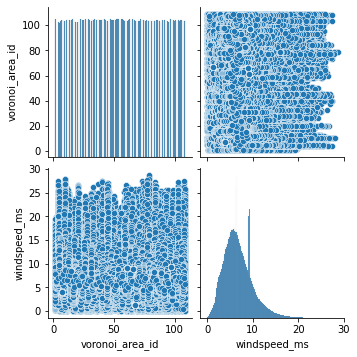

In [22]:
sns.pairplot(einspeise)

<AxesSubplot:>

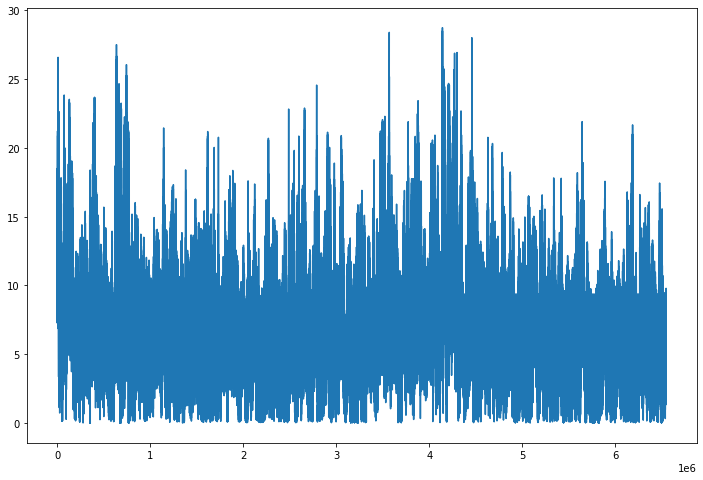

In [65]:
plt.figure(figsize=(12,8))
einspeise['windspeed_ms'].plot()


## Quick EDA on epex_da_de.json

In [39]:
epex_da_de = pd.read_json('data/epex_da_de.json', header=None)


TypeError: read_json() got an unexpected keyword argument 'header'

## Quick EDA on EQ_epex_da_prognosis.csv

In [35]:
EQ_epex = pd.read_csv('data/EQ_epex_da_prognosis.csv', header=None) 
EQ_epex.head()

,0,1,2
0,2018-12-27 23:00:00,42.49,2018-12-26 23:00:00
1,2018-12-28 00:00:00,35.95,2018-12-26 23:00:00
2,2018-12-28 01:00:00,34.18,2018-12-26 23:00:00
3,2018-12-28 02:00:00,34.00,2018-12-26 23:00:00
4,2018-12-28 03:00:00,34.79,2018-12-26 23:00:00


In [36]:
EQ_epex.shape

(483097, 3)

In [19]:
EQ_epex.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 483096 entries, 0 to 483095
Data columns (total 3 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   2018-12-27 23:00:00  483096 non-null  object 
 1   42.49                483096 non-null  float64
 2   2018-12-26 23:00:00  483096 non-null  object 
dtypes: float64(1), object(2)
memory usage: 11.1+ MB


In [37]:
EQ_epex.describe()

,1
count,483097.000000
mean,41.623158
std,17.094543
min,-197.710000
25%,30.730000
50%,40.260000
75%,51.200000
max,141.100000


In [17]:
EQ_epex.isnull().sum()

2018-12-27 23:00:00    0
42.49                  0
2018-12-26 23:00:00    0
dtype: int64

In [18]:
EQ_epex.isna().sum()

2018-12-27 23:00:00    0
42.49                  0
2018-12-26 23:00:00    0
dtype: int64

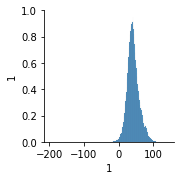

In [38]:
sns.pairplot(EQ_epex)